In [1]:
import csv 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random 
import matplotlib.colors as mcolors
from matplotlib import cm
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
sns.set('talk')

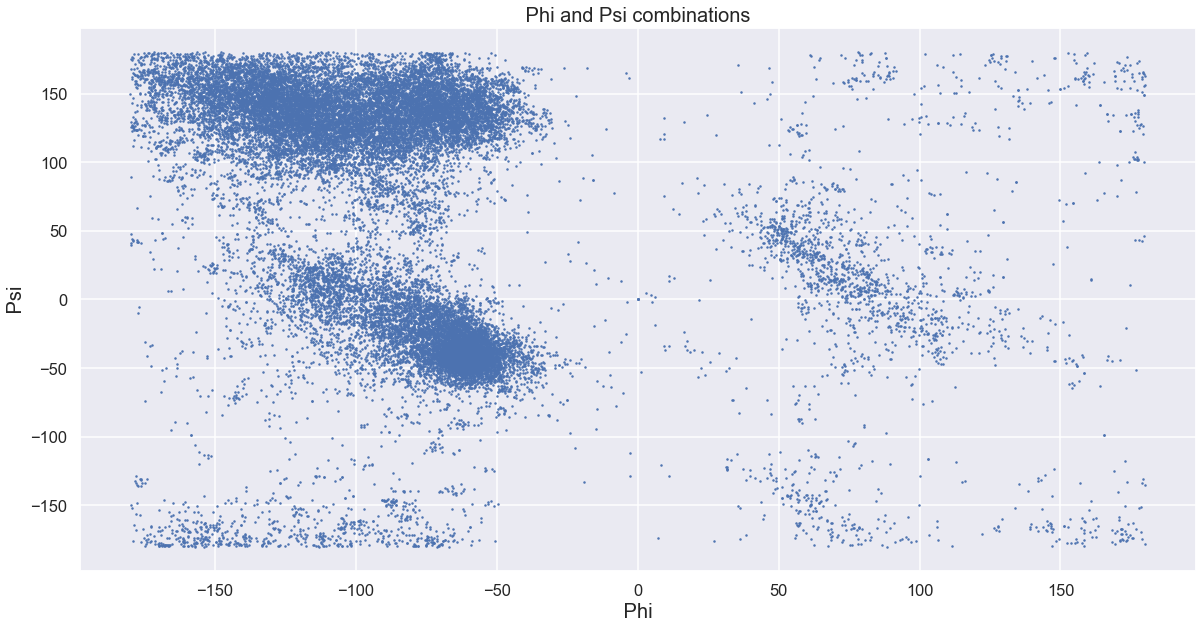

In [3]:
with open('data_all.csv',newline='') as f:         #Ouverture du fichier CSV
    tableau=[]
    lire=csv.reader(f)                            #chargement des lignes du fichier csv
    print('',end='\n')
    for ligne in lire:                            #Pour chaque ligne... 
        #print(ligne, end='\n')                    #...affichage de la ligne dans la console ...
        tableau.append(ligne)                     #...on ajoute la ligne dans la liste ...
df=pd.read_csv('data_all.csv')

fig,ax = plt.subplots(1, 1, figsize=(20, 10))

plt.scatter(df['phi'],df['psi'],s=1)
#ax.scatter(df['phi'],df['psi'],color=color)
ax.set_title(" Phi and Psi combinations ",fontsize=20)
ax.set_xlabel(" Phi ",fontsize=20)
ax.set_ylabel(" Psi ",fontsize=20);

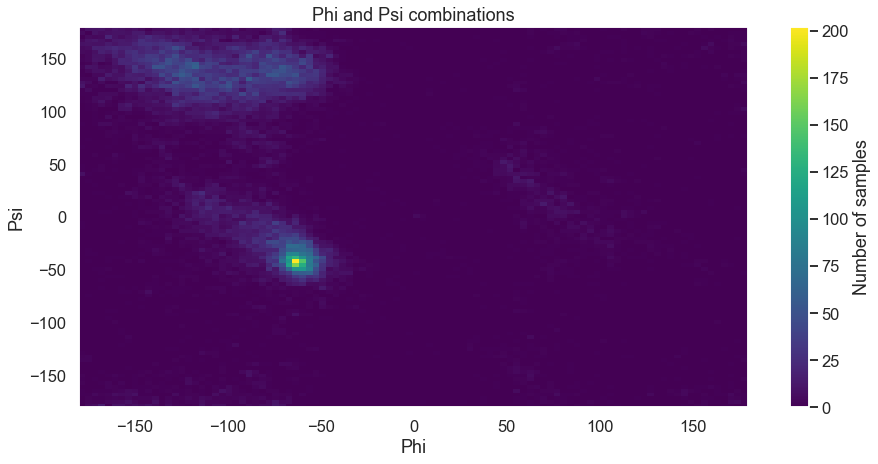

In [4]:
#HeatMap

# Set size of the figure
plt.figure(figsize=(15, 7))
# Plot 2D histogram from X
# We can choose different colormaps (i.e., viridis, plasma, inferno, magma, cividis).
plt.hist2d(df['phi'], df['psi'], bins=100, cmap='viridis')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')

# Add title and labels to plot.
plt.xlabel("Phi")
plt.ylabel("Psi")
plt.title('Phi and Psi combinations')

# Show the plot.
plt.show()


In [7]:
# Specify the number of clusters (3!!) and fit the data X
dbscan_data=df[['phi','psi']]
dbscan_data=dbscan_data.values.astype('float32',copy=False)

comb=np.column_stack([dbscan_data[0],dbscan_data[1]])
kmeans = KMeans(n_clusters=3, random_state=0).fit(comb)

ValueError: n_samples=2 should be >= n_clusters=3.

In [ ]:

fig,ax = plt.subplots(1, 1, figsize=(20, 10))
plt.scatter(df['phi'],df['psi'],s=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [ ]:
fig,ax = plt.subplots(1, 1, figsize=(20, 10))
ax.scatter(df['phi'],df['psi'],s=1,c=kmeans.labels_,cmap="hsv")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x')
ax.set_xlabel(" Phi ",fontsize=20)
ax.set_ylabel(" Psi ",fontsize=20);
plt.title(' Phi and Psi combinations and cluster centroids')
plt.show()

In [ ]:
#Elbow method

distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(comb)
    distortions.append(kmeanModel.inertia_)
    
fig,ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(K, distortions, 'rx-')
for k in K:
    ax.axvline(k,color='gray',linestyle='--',lw=1)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Diameter')
ax.set_title('The Elbow Method showing the optimal k');


# DBSCAN Method

In [ ]:
df.info()

In [ ]:
dbscan_data=df[['phi','psi']]
dbscan_data=dbscan_data.values.astype('float32',copy=False)


In [8]:
dbscan_data_scaler=StandardScaler().fit(dbscan_data)
dbscan_data=dbscan_data_scaler.transform(dbscan_data)
dbscan_data

array([[-1.1777204 ,  0.86048543],
       [ 0.66984934,  0.7874413 ],
       [-0.6615983 , -2.556653  ],
       ...,
       [-0.5492596 ,  0.52503335],
       [-0.32202563, -0.8379765 ],
       [-1.540769  ,  0.3290426 ]], dtype=float32)

In [ ]:
db = DBSCAN(eps=0.3, min_samples=7,metric='euclidan').fit(X) #Avoir